<a href="https://colab.research.google.com/github/Ssurf777/VAEforPointCloud/blob/main/main_for_standardVAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 14.4 MB/s eta 0:00:00


In [2]:
import requests
import os

def download_file(url, local_filename):
    """Downloads a file from a URL to a local file."""
    print(f"Downloading {url}...")
    try:
        with requests.get(url, stream=True) as r:
            r.raise_for_status()
            with open(local_filename, 'wb') as f:
                for chunk in r.iter_content(chunk_size=4096):  # Smaller chunk size
                    f.write(chunk)
        print(f"{local_filename} downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {local_filename}: {e}")

# URLs for downloading
urls = {
    "utils.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/utils.py",
    "file_io.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/file_io.py",
    "point_cloud.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/point_cloud.py",
    "sampling.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/sampling.py",
    "vae_models.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/vae_models.py",
    "ChamferDis.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/ChamferDis.py",
    "EarthMoversDis.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/EarthMoversDis.py",
    "train.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/train.py",
    "visualize_loss.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/visualize_loss.py",
    "Dataloader.py": "https://raw.githubusercontent.com/Ssurf777/VAEforPointCloud/main/lib/Dataloader.py",
}

# Download each file
for local_filename, url in urls.items():
    download_file(url, local_filename)



utils.py downloaded successfully.
file_io.py downloaded successfully.
point_cloud.py downloaded successfully.
sampling.py downloaded successfully.
vae_models.py downloaded successfully.
ChamferDis.py downloaded successfully.
EarthMoversDis.py downloaded successfully.
train.py downloaded successfully.
visualize_loss.py downloaded successfully.
Dataloader.py downloaded successfully.


In [3]:

# Import downloaded modules
import utils
import file_io
import point_cloud
import sampling
import vae_models
import ChamferDis
import EarthMoversDis
import train
import Dataloader
import visualize_loss
from utils import get_available_memory
from file_io import read_off
from point_cloud import pcshow
from sampling import PointSampler
from vae_models import standVAE
from ChamferDis import chamfer_distance
from EarthMoversDis import emd_distance
from train import train
from visualize_loss import visualize_loss
from Dataloader import prepare_data

available_memory_gb = get_available_memory()
print(f"Available memory: {available_memory_gb:.2f} GB")

Available memory: 10.90 GB


In [4]:
import torch
import torch.optim as optim


device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_points =5000
# データ準備
file_names = [f"/content/drive/MyDrive/chair/chair_{i:04d}.off" for i in range(1, 10)]
data_loader = prepare_data(file_names, num_points=num_points, device=device)
print(len(data_loader))
# VAEモデル構築
vae = standVAE(n_in_out=3 * num_points, n_z=3).to(device)
optimizer = optim.Adam(vae.parameters(), lr=1e-5)

9


In [ ]:
epochs=5000
interval=100

rec_error_record = []
reg_error_record = []
total_error_record = []
z_list = []
for i in range(epochs):
    vae.train()
    loss_rec = 0
    loss_reg = 0
    loss_total = 0


    for k, (x,) in enumerate(data_loader):
            # xをdeviceに移動
            x = x.to(device)
            x = x.squeeze(0)

            # VAEの出力と損失を計算
            y, z, mu, logvar = vae(x)  #
            lrec, lreg = vae.loss(y, x, mu, logvar)

            # 損失の合計を計算
            loss = lrec + lreg
            loss_rec += lrec.item()
            loss_reg += lreg.item()
            loss_total += loss.item()

            # 最適化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # 最終エポックでzを収集
            if i == epochs - 1:
                z_list.append(z.cpu().detach().numpy())

    # 平均を計算
    loss_rec /=  (k + 1)
    loss_reg /=  (k + 1)
    loss_total /=  (k + 1)

    # ログの記録
    rec_error_record.append(loss_rec)
    reg_error_record.append(loss_reg)
    total_error_record.append(loss_total)

    # 指定間隔でのログ出力
    if i % interval == 0:
        print(f"Epoch:{i} Loss_Rec:{loss_rec} Loss_Reg:{loss_reg} Loss_Total:{loss_total}")

# z_listを結合
z_list = np.concatenate(z_list, axis=0)

Epoch:0 Loss_Rec:5759.215549045139 Loss_Reg:0.00622979137632582 Loss_Total:5759.221842447917
Epoch:100 Loss_Rec:1582.1609700520833 Loss_Reg:32.75707138909234 Loss_Total:1614.9180365668403
Epoch:200 Loss_Rec:1138.3752305772568 Loss_Reg:19.088272094726562 Loss_Total:1157.4635077582466
Epoch:300 Loss_Rec:1136.0936889648438 Loss_Reg:11.671282450358072 Loss_Total:1147.7649807400173
Epoch:400 Loss_Rec:1135.976067437066 Loss_Reg:8.801047113206652 Loss_Total:1144.777126736111
Epoch:500 Loss_Rec:1135.3028496636284 Loss_Reg:7.5750340355767145 Loss_Total:1142.877882215712
Epoch:600 Loss_Rec:1135.050069173177 Loss_Reg:6.511685901217991 Loss_Total:1141.5617540147568
Epoch:700 Loss_Rec:1135.3323160807292 Loss_Reg:5.966014597151014 Loss_Total:1141.2983262803818
Epoch:800 Loss_Rec:1136.3849487304688 Loss_Reg:5.471216413709852 Loss_Total:1141.856174045139
Epoch:900 Loss_Rec:1133.8776448567708 Loss_Reg:5.003099812401666 Loss_Total:1138.8807373046875
Epoch:1000 Loss_Rec:1133.8716227213542 Loss_Reg:5.3689

In [ ]:
# 損失の可視化
visualize_loss(rec_error_record, reg_error_record, total_error_record)

# モデル保存
torch.save(vae.state_dict(), '/content/drive/MyDrive/chair/StandVAE_Np5000_MSE_0216.pth')
print("Model weights have been saved!")

In [ ]:
print(z_list) # z mu logvar

# 再構成形状の可視化

tensor([-1.4766,  2.5830,  0.7226], device='cuda:0')
tensor([2.4742, 1.7066, 0.5874], device='cuda:0')
tensor([1.5746, 2.4922, 0.2272], device='cuda:0')
tensor([-2.2467,  1.3355,  0.0686], device='cuda:0')
tensor([ 2.9570,  0.3280, -0.3766], device='cuda:0')
tensor([ 2.1289, -2.1349,  0.8137], device='cuda:0')
tensor([ 0.0331,  2.8475, -0.3825], device='cuda:0')
tensor([ 2.5118, -0.8100, -0.5227], device='cuda:0')
tensor([-2.9258, -0.3866, -0.6814], device='cuda:0')


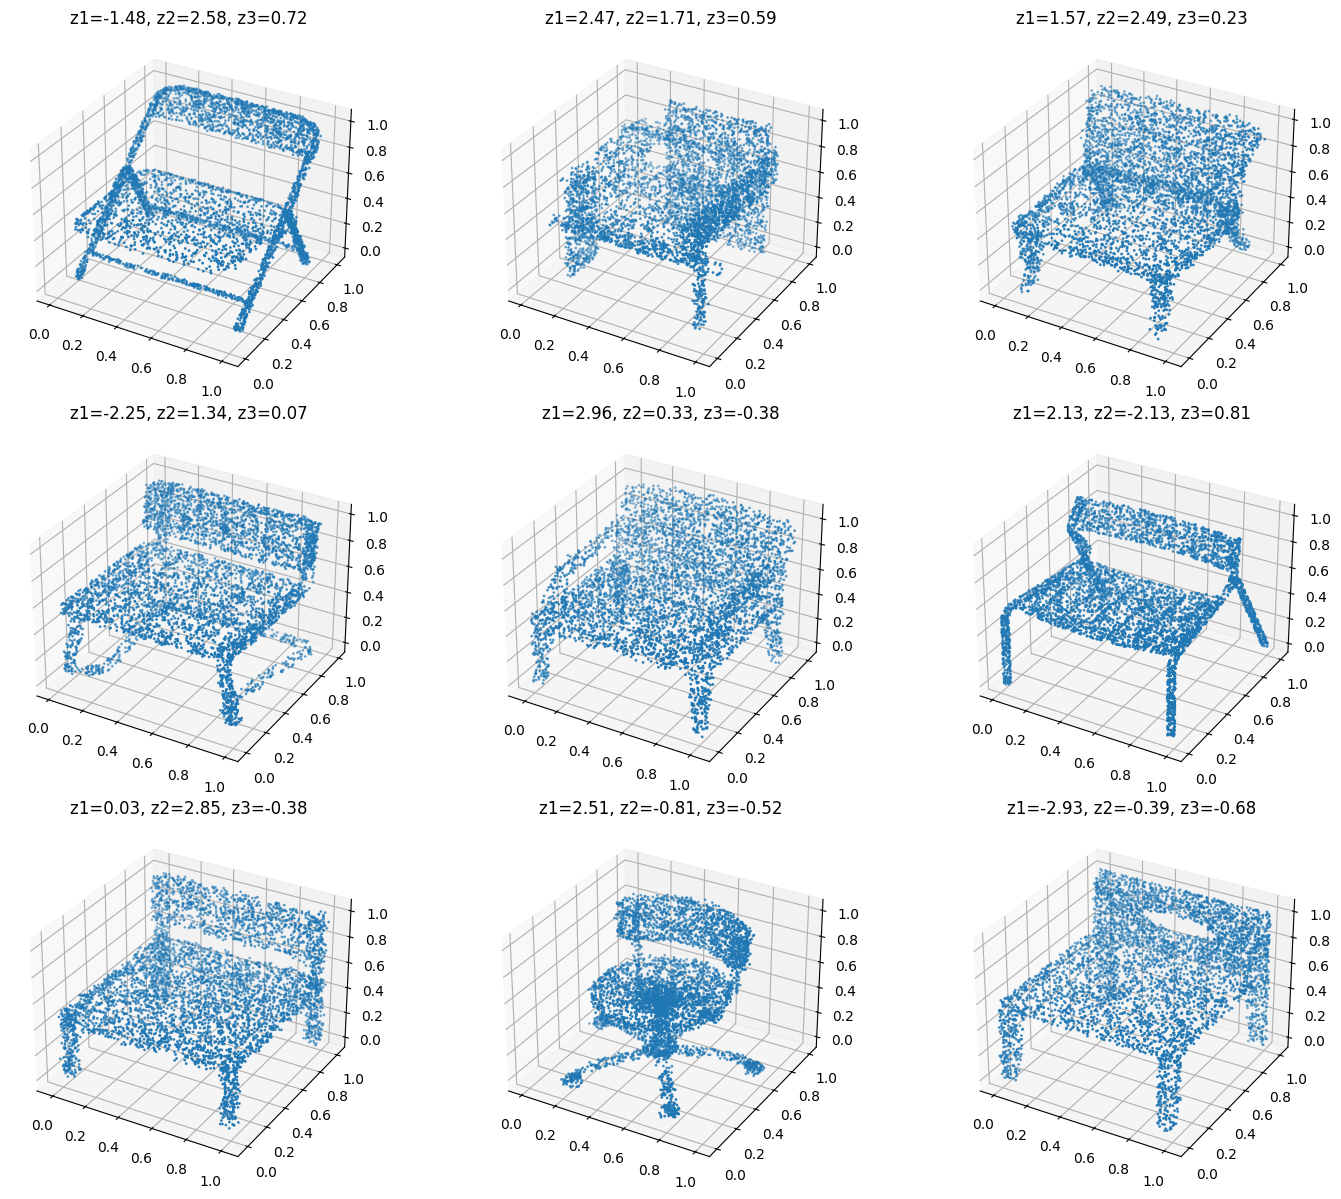

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# 可視化用の設定
num_points = 5000  # 必要に応じて変更
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), subplot_kw={'projection': '3d'})
axes = axes.flatten()

# 再構築と可視化
for index, z in enumerate(z_list):
    if index >= len(axes):
        break  # プロット数を超えたら終了
    z = torch.from_numpy(z).float().to(device)

    # zとcon_zをバッチ次元付きでdecodeに渡す
    in_z = z.to(device)  # zはそのまま使用
    print(z)
    # 再構築
    recon_batch = vae.decode(in_z)

    # CPU上で detach してから numpy() に変換
    reconst = recon_batch.cpu().detach().reshape(-1)

    # num_pointsに基づいて点群を分割
    reconst_x = reconst[:num_points]
    reconst_y = reconst[num_points:2*num_points]
    reconst_z = reconst[2*num_points:3*num_points]

    # プロット
    title = f"z1={z[0]:.2f}, z2={z[1]:.2f}, z3={z[2]:.2f}"
    axes[index].scatter(reconst_x, reconst_y, reconst_z, s=1)
    axes[index].set_title(title)

# 最後に残ったプロットを表示
plt.tight_layout()
plt.show()


# 再構成誤差チェック using CD

Chamfer Distances: [0.1942943036556244, 0.1273428052663803, 0.1500154286623001, 0.14201782643795013, 0.15281005203723907, 0.21234437823295593, 0.17530374228954315, 0.13348346948623657, 0.1609298139810562]
Average Chamfer Distance: 0.1609490911165873


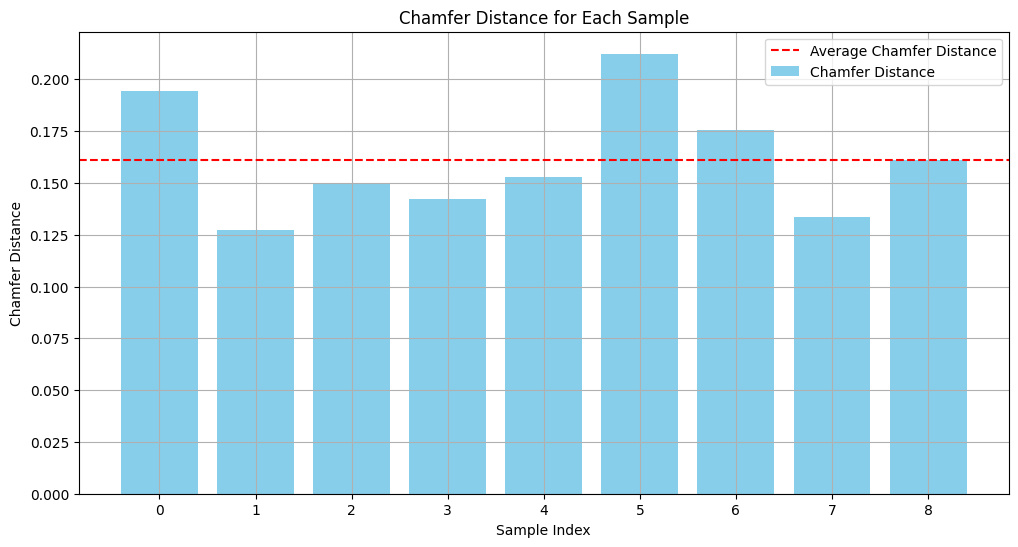

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Chamfer Distanceの計算
chamfer_distances = []
for i, (x,) in enumerate(data_loader):
    x = x.to(device)
    x = x.squeeze(0)

    # Decode z_list[i]
    z = torch.tensor(z_list[i]).to(device)
    recon_batch = vae.decode(z)

    # 再構築された点群の形状を整える
    reconst = recon_batch.cpu().detach().reshape(-1)
    reconst_x = reconst[:num_points]
    reconst_y = reconst[num_points:2*num_points]
    reconst_z = reconst[2*num_points:3*num_points]
    reconstructed_point_cloud = torch.stack([reconst_x, reconst_y, reconst_z], dim=-1).unsqueeze(0).to(device)

    # 元の点群の形状を整える
    original_point_cloud = x.reshape(1, num_points, 3).to(device)

    # カスタム関数でChamfer Distanceを計算
    loss_cd = chamfer_distance(original_point_cloud, reconstructed_point_cloud)
    chamfer_distances.append(loss_cd.item())

# Chamfer距離を出力
print("Chamfer Distances:", chamfer_distances)
average_chamfer_distance = sum(chamfer_distances) / len(chamfer_distances)
print(f"Average Chamfer Distance: {average_chamfer_distance}")

import matplotlib.pyplot as plt

# Chamfer Distancesの棒グラフをプロット
plt.figure(figsize=(12, 6))
plt.bar(range(len(chamfer_distances)), chamfer_distances, color='skyblue', label='Chamfer Distance')
plt.axhline(y=average_chamfer_distance, color='r', linestyle='--', label='Average Chamfer Distance')

# グラフの装飾
plt.title('Chamfer Distance for Each Sample')
plt.xlabel('Sample Index')
plt.ylabel('Chamfer Distance')
plt.xticks(range(len(chamfer_distances)))
plt.legend()
plt.grid(True)
plt.show()


# 再構成誤差チェック using EMD

/usr/local/lib/python3.11/dist-packages/ot/lp/__init__.py:630: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  check_result(result_code)


EMD Distances: [0.22100300436758463, 0.15368277612443046, 0.18053489931574185, 0.17417281204514437, 0.18606962156249066, 0.2237483606134316, 0.21258545732749123, 0.15118320445988165, 0.21371427499463347]
Average EMD Distance: 0.19074382342342555


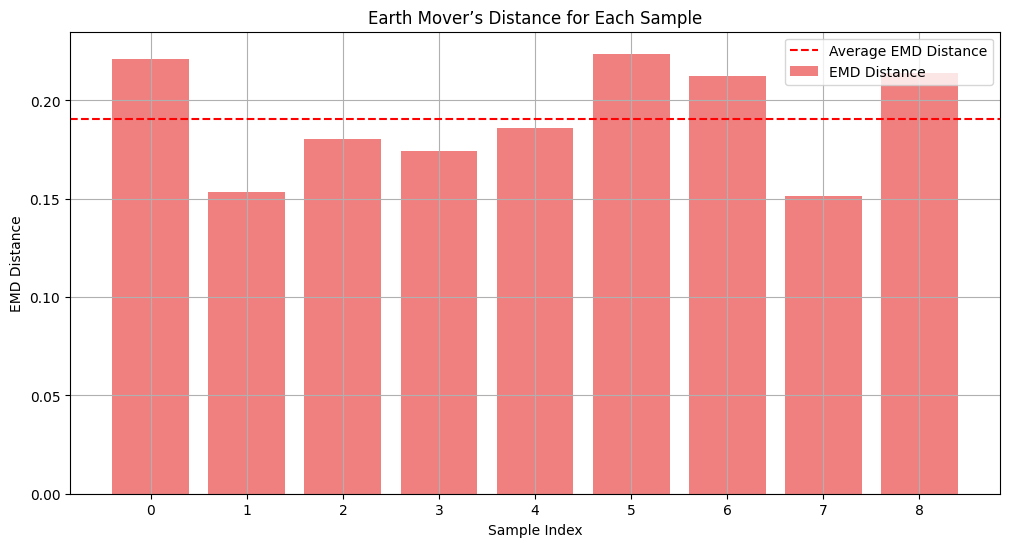

In [ ]:
import torch
import ot  # Optimal Transportライブラリ
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# EMDの計算
emd_distances = []
for i, (x,) in enumerate(data_loader):
    x = x.to(device)
    x = x.squeeze(0)

    # Decode z_list[i]
    z = torch.tensor(z_list[i]).to(device)
    recon_batch = vae.decode(z)

    # 再構築された点群の形状を整える
    reconst = recon_batch.cpu().detach().reshape(-1)
    reconst_x = reconst[:num_points]
    reconst_y = reconst[num_points:2*num_points]
    reconst_z = reconst[2*num_points:3*num_points]
    reconstructed_point_cloud = torch.stack([reconst_x, reconst_y, reconst_z], dim=-1).to(device)

    # 元の点群の形状を整える
    original_point_cloud = x.reshape(num_points, 3).to(device)

    # カスタム関数でEMDを計算
    loss_emd = emd_distance(original_point_cloud, reconstructed_point_cloud)
    emd_distances.append(loss_emd)

# EMDの結果を出力
print("EMD Distances:", emd_distances)
average_emd_distance = sum(emd_distances) / len(emd_distances)
print(f"Average EMD Distance: {average_emd_distance}")

# EMDの棒グラフをプロット
plt.figure(figsize=(12, 6))
plt.bar(range(len(emd_distances)), emd_distances, color='lightcoral', label='EMD Distance')
plt.axhline(y=average_emd_distance, color='r', linestyle='--', label='Average EMD Distance')

# グラフの装飾
plt.title('Earth Mover’s Distance for Each Sample')
plt.xlabel('Sample Index')
plt.ylabel('EMD Distance')
plt.xticks(range(len(emd_distances)))
plt.legend()
plt.grid(True)
plt.show()
